In [1]:
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


# Read CSV

In [2]:
from google.colab import files
uploaded = files.upload()

Saving crypto_data.csv to crypto_data (2).csv


In [3]:
#data = pd.read_csv('crypto_data.csv')
data = pd.read_csv(io.BytesIO(uploaded['crypto_data.csv']))

In [4]:
# view data
data.head(5)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


# Discard  Non Trading Cryptocurrencies

In [5]:
# Check how many aren't trading
NotTrading = data[data['IsTrading']==False]

In [6]:
# Verify expected data
NotTrading.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
97,FSTC,FastCoin,Scrypt,False,PoW,NaN,165888000
119,KEYC,KeyCoin,X13,False,PoW/PoS,NaN,1000000
132,MINRL,Minerals Coin,X11,False,PoW/PoS,NaN,1000000
201,XCSH,Xcash,Scrypt,False,PoW/PoS,NaN,2400000
269,CAMC,Camcoin,X11,False,PoW/PoS,NaN,10000000


In [7]:
# Count how many aren't trading
NotTrading.count()

Unnamed: 0         108
CoinName           108
Algorithm          108
IsTrading          108
ProofType          108
TotalCoinsMined     59
TotalCoinSupply    108
dtype: int64

In [8]:
#Check how many are trading
Trading = data[data['IsTrading']==True]

In [9]:
Trading.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [10]:
# Count how many are trading
Trading.count()

Unnamed: 0         1144
CoinName           1144
Algorithm          1144
IsTrading          1144
ProofType          1144
TotalCoinsMined     685
TotalCoinSupply    1144
dtype: int64

In [11]:
# set analysis variable to trading currencies
TradingCryptoData = data[data.IsTrading == True]

In [12]:
TradingCryptoData.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [13]:
# Verify trading count
TradingCryptoData.count()

Unnamed: 0         1144
CoinName           1144
Algorithm          1144
IsTrading          1144
ProofType          1144
TotalCoinsMined     685
TotalCoinSupply    1144
dtype: int64

In [14]:
# Drop IsTrading column since all data is True
TrueTradingCryptoData = TradingCryptoData.drop('IsTrading', axis=1)
TrueTradingCryptoData.head(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


# Remove all rows that have a null value

In [15]:
# Sum the number of null values
TrueTradingCryptoData.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [16]:
# Sum the number of duplicate values 
TrueTradingCryptoData.duplicated().sum()

0

In [17]:
# Drop rows that have null values
TrueTradingCryptoData = TrueTradingCryptoData.dropna()

In [18]:
# Verify column was removed
TrueTradingCryptoData.head(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [19]:
# Verify null values were removed
TrueTradingCryptoData.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [20]:
# Count True data
TrueTradingCryptoData.count()

Unnamed: 0         685
CoinName           685
Algorithm          685
ProofType          685
TotalCoinsMined    685
TotalCoinSupply    685
dtype: int64

# Filter cryptocurrencies that have been mined at least once

In [44]:
# Remove rows that aren't being mined
TrueTradingCryptoDataMined = TrueTradingCryptoData[TrueTradingCryptoData['TotalCoinsMined'] > 0]
TrueTradingCryptoDataMined.count()

Unnamed: 0         532
CoinName           532
Algorithm          532
ProofType          532
TotalCoinsMined    532
TotalCoinSupply    532
dtype: int64

# Remove CoinName from dataframe

In [45]:
# Create a new DataFrame that holds only the cryptocurrencies names.
# saved as a Dataframe for later use
crypto_CoinNames = TrueTradingCryptoDataMined.filter(["CoinName"]).reset_index(drop=True)
crypto_CoinNames = pd.DataFrame(crypto_CoinNames)
crypto_CoinNames

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [46]:
# remove CoinName and Unnamed column
TrueTradingCryptoDataMined = TrueTradingCryptoDataMined.drop(['Unnamed: 0','CoinName'], axis=1)
TrueTradingCryptoDataMined

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


# Convert features with text values to numerical data

In [47]:
# Convert text features to variables
TrueTradingCryptoDataMined = pd.get_dummies(TrueTradingCryptoDataMined, columns=["Algorithm", "ProofType"])
TrueTradingCryptoDataMined

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,Algorithm_CryptoNight Heavy,Algorithm_CryptoNight-V7,Algorithm_Cryptonight-GPU,Algorithm_DPoS,Algorithm_Dagger,Algorithm_Dagger-Hashimoto,Algorithm_ECC 256K1,Algorithm_Equihash,Algorithm_Equihash+Scrypt,Algorithm_Ethash,Algorithm_Exosis,Algorithm_Green Protocol,Algorithm_Groestl,Algorithm_HMQ1725,Algorithm_HybridScryptHash256,Algorithm_IMesh,Algorithm_Jump Consistent Hash,Algorithm_Keccak,Algorithm_Leased POS,Algorithm_Lyra2RE,Algorithm_Lyra2REv2,Algorithm_Lyra2Z,Algorithm_M7 POW,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Ouroboros,...,Algorithm_SkunkHash,Algorithm_SkunkHash v2 Raptor,Algorithm_Stanford Folding,Algorithm_TRC10,Algorithm_Time Travel,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN,ProofType_DPOS,ProofType_DPoS,ProofType_HPoW,ProofType_LPoS,ProofType_POBh,ProofType_PoA,ProofType_PoC,ProofType_PoS,ProofType_PoS/LPoS,ProofType_PoS/PoW,ProofType_PoS/PoW/PoT,ProofType_PoST,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW and PoS,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# Examine the number of rows and columns of your dataset now. How did they change?

The Amount of Rows stayed the same, but the amout of columns went from 4 to 98

# Standardize dataset

In [25]:
# Standardize the data with StandardScaler().
TrueTradingCryptoDataMined_SScaled = StandardScaler().fit_transform(TrueTradingCryptoDataMined)
print(TrueTradingCryptoDataMined_SScaled)
TrueTradingCryptoDataMined_SScaled.shape

[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


(532, 98)

# Dimensionality Reduction

In [26]:
# Initialize PCA model
pca = PCA(n_components=.90,svd_solver='auto')

In [27]:
TrueTradingCryptoDataMined_SScaled_pca = pca.fit_transform(TrueTradingCryptoDataMined_SScaled)
print(TrueTradingCryptoDataMined_SScaled_pca)
TrueTradingCryptoDataMined_SScaled_pca.shape

[[-3.35098808e-01  1.03218907e+00 -5.90713438e-01 ... -2.27744479e-16
   1.90574176e-15  7.23781417e-17]
 [-3.18433948e-01  1.03233143e+00 -5.91125551e-01 ...  1.12962196e-15
   1.17892527e-15  1.88146348e-16]
 [ 2.30546811e+00  1.65638302e+00 -6.83616670e-01 ... -1.41763289e-14
   1.97999583e-14 -9.84974870e-15]
 ...
 [ 3.24348535e-01 -2.31230764e+00  4.21515366e-01 ...  1.12420030e-14
  -2.17040184e-14 -2.86404270e-14]
 [-1.49363652e-01 -2.04933553e+00  4.12968257e-01 ... -4.00941613e-15
   1.61082073e-15  4.15380634e-15]
 [-2.89957500e-01  8.21194511e-01 -2.76326847e-01 ...  5.54543836e-16
  -1.22058397e-16  1.12243232e-15]]


(532, 74)

# How did the number of the features change?

Preserving 90% of the explained variance reduced the features by 24.

# Convert Features to a datframe

In [28]:
TrueTradingCryptoDataMined_SScaled_pca_df = pd.DataFrame(TrueTradingCryptoDataMined_SScaled_pca)
TrueTradingCryptoDataMined_SScaled_pca_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,1.667603e-14,-3.051213e-14,-5.760213e-12,-0.007129,-1.319756,-0.051813,-0.333925,0.163298,0.189801,-0.468650,0.978620,0.147488,0.134199,0.127648,0.011840,0.019343,-0.025763,-0.002518,-0.002149,0.003882,0.022930,-0.007721,0.001229,-0.000545,1.013005e-15,-4.419728e-15,-0.000007,0.001031,-0.001763,0.004791,-0.000148,0.002058,0.010026,0.000229,-0.001106,-0.000561,-7.954525e-16,4.925948e-15,-0.000832,0.001951,0.001857,-0.001767,0.005871,-0.000469,-2.431986e-15,-3.751834e-16,3.200070e-15,-1.676430e-15,2.246399e-15,1.819460e-15,-1.324204e-16,-1.679535e-15,-2.278197e-15,1.755650e-15,-2.295873e-15,-1.820023e-16,1.819800e-15,1.963220e-15,9.646586e-16,-5.082516e-17,1.137450e-15,-8.589135e-16,-1.114271e-15,1.062606e-15,-2.575131e-15,8.416751e-16,2.961301e-15,-2.277445e-16,1.905742e-15,7.237814e-17
1,-0.318434,1.032331,-0.591126,0.001386,1.669172e-14,-3.041332e-14,-5.712174e-12,-0.007739,-1.322514,-0.056674,-0.330610,0.162906,0.189481,-0.468790,0.978046,0.147708,0.134424,0.127510,0.012512,0.018143,-0.025762,-0.002529,-0.002177,0.003896,0.022858,-0.007762,0.001201,-0.000615,9.689545e-16,-4.157532e-15,-0.000007,0.001012,-0.001767,0.004819,-0.000120,0.001861,0.010087,0.000257,-0.001068,-0.000585,-1.195681e-15,4.488129e-15,-0.000875,0.001963,0.001814,-0.001780,0.005875,-0.000510,-2.402009e-15,2.839020e-16,2.603927e-15,-2.337921e-15,1.666689e-15,3.376986e-15,-2.441386e-16,-1.217771e-15,-1.798324e-15,9.992895e-16,-2.353571e-15,1.314114e-17,1.335371e-15,1.867067e-15,1.519876e-15,3.374747e-16,1.655934e-15,-7.015566e-16,-1.772502e-15,5.422083e-16,-2.429549e-15,8.914522e-16,2.844515e-15,1.129622e-15,1.178925e-15,1.881463e-16
2,2.305468,1.656383,-0.683617,0.004731,2.692694e-14,-4.278568e-14,-1.975034e-11,-0.054781,-1.542879,-0.943951,0.374889,-0.561776,0.026873,0.047110,-1.039621,0.219448,-1.688305,0.008348,-1.711482,0.931298,4.426936,-0.749091,-0.382153,0.112013,-1.028598,0.742266,-0.021066,0.005821,-5.391596e-14,4.478203e-14,-0.000024,0.028941,0.008545,-0.127003,0.011300,-0.101042,-0.236215,0.062373,-0.068260,0.004104,-3.664430e-14,-1.271506e-14,0.011515,0.026692,-0.037085,0.036975,-0.150322,0.006612,-3.726830e-14,-2.806156e-14,2.326893e-14,-6.418289e-15,1.101417e-14,-3.099717e-14,1.924045e-14,-3.588683e-14,3.459658e-14,4.037562e-14,3.648596e-14,-6.535224e-14,-2.050035e-14,-1.859669e-14,7.262713e-15,7.972629e-14,-5.851539e-14,2.653738e-14,1.042134e-14,-1.383548e-14,4.458706e-14,-8.158920e-15,-8.549804e-15,-1.417633e-14,1.979996e-14,-9.849749e-15
3,-0.145184,-1.320593,0.192813,-0.001229,-6.961333e-15,1.139629e-14,5.130117e-12,-0.002071,0.281463,0.251862,-0.079743,-0.221851,-0.018797,0.043301,-0.606684,-0.335134,-1.280389,-0.180708,2.838341,0.695672,0.096188,-0.057237,-0.005635,-0.001188,-0.051979,0.144005,0.019333,0.001314,-6.151747e-15,-1.873379e-14,-0.000024,0.004295,-0.022873,-0.016863,0.000919,-0.010940,-0.028884,-0.008443,-0.028585,-0.006001,3.376096e-14,3.812402e-14,-0.009760,0.010628,0.011739,-0.005296,-0.027956,0.001026,9.659471e-15,-3.838152e-15,-2.060608e-15,4.688519e-15,6.535166e-15,-2.085578e-15,6.860222e-15,-4.781174e-16,5.779301e-15,5.115743e-15,-2.438838e-15,-6.174247e-15,-5.953490e-16,-1.506548e-14,-1.104903e-15,9.494653e-15,-4.747273e-15,6.756146e-15,-1.868801e-15,-1.905755e-15,7.844799e-15,2.746995e-15,-2.299481e-15,2.771449e-16,-1.701001e-15,-1.149523e-14
4,-0.151768,-2.036192,0.396182,-0.001705,-1.611902e-14,2.289778e-14,7.086071e-12,0.027735,0.519099,0.188820,0.074089,-0.114184,-0.053636,0.078289,-0.309393,-0.499678,-0.311618,-0.189054,-0.543264,-1.654176,0.630961,0.392178,-2.859242,-4.833633,3.413714,2.790047,0.456218,-0.033210,3.901352e-14,-3.229560e-13,0.000020,0.017768,-0.422130,0.034782,0.003337,-0.040870,0.122776,-0.224883,-0.305172,-0.029164,2.526748e-13,2.156278e-13,-0.047

In [29]:
# Create column names

PCcolumn = [f'PC{i}' for i in range(1,75)]
PCcolumn[:10]

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [30]:
# Add created column names to dataframe

TrueTradingCryptoDataMined_SScaled_pca_df = pd.DataFrame(TrueTradingCryptoDataMined_SScaled_pca, columns=PCcolumn)
TrueTradingCryptoDataMined_SScaled_pca_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74
0,-0.335099,1.032189,-0.590713,0.001397,1.667603e-14,-3.051213e-14,-5.760213e-12,-0.007129,-1.319756,-0.051813,-0.333925,0.163298,0.189801,-0.468650,0.978620,0.147488,0.134199,0.127648,0.011840,0.019343,-0.025763,-0.002518,-0.002149,0.003882,0.022930,-0.007721,0.001229,-0.000545,1.013005e-15,-4.419728e-15,-0.000007,0.001031,-0.001763,0.004791,-0.000148,0.002058,0.010026,0.000229,-0.001106,-0.000561,-7.954525e-16,4.925948e-15,-0.000832,0.001951,0.001857,-0.001767,0.005871,-0.000469,-2.431986e-15,-3.751834e-16,3.200070e-15,-1.676430e-15,2.246399e-15,1.819460e-15,-1.324204e-16,-1.679535e-15,-2.278197e-15,1.755650e-15,-2.295873e-15,-1.820023e-16,1.819800e-15,1.963220e-15,9.646586e-16,-5.082516e-17,1.137450e-15,-8.589135e-16,-1.114271e-15,1.062606e-15,-2.575131e-15,8.416751e-16,2.961301e-15,-2.277445e-16,1.905742e-15,7.237814e-17
1,-0.318434,1.032331,-0.591126,0.001386,1.669172e-14,-3.041332e-14,-5.712174e-12,-0.007739,-1.322514,-0.056674,-0.330610,0.162906,0.189481,-0.468790,0.978046,0.147708,0.134424,0.127510,0.012512,0.018143,-0.025762,-0.002529,-0.002177,0.003896,0.022858,-0.007762,0.001201,-0.000615,9.689545e-16,-4.157532e-15,-0.000007,0.001012,-0.001767,0.004819,-0.000120,0.001861,0.010087,0.000257,-0.001068,-0.000585,-1.195681e-15,4.488129e-15,-0.000875,0.001963,0.001814,-0.001780,0.005875,-0.000510,-2.402009e-15,2.839020e-16,2.603927e-15,-2.337921e-15,1.666689e-15,3.376986e-15,-2.441386e-16,-1.217771e-15,-1.798324e-15,9.992895e-16,-2.353571e-15,1.314114e-17,1.335371e-15,1.867067e-15,1.519876e-15,3.374747e-16,1.655934e-15,-7.015566e-16,-1.772502e-15,5.422083e-16,-2.429549e-15,8.914522e-16,2.844515e-15,1.129622e-15,1.178925e-15,1.881463e-16
2,2.305468,1.656383,-0.683617,0.004731,2.692694e-14,-4.278568e-14,-1.975034e-11,-0.054781,-1.542879,-0.943951,0.374889,-0.561776,0.026873,0.047110,-1.039621,0.219448,-1.688305,0.008348,-1.711482,0.931298,4.426936,-0.749091,-0.382153,0.112013,-1.028598,0.742266,-0.021066,0.005821,-5.391596e-14,4.478203e-14,-0.000024,0.028941,0.008545,-0.127003,0.011300,-0.101042,-0.236215,0.062373,-0.068260,0.004104,-3.664430e-14,-1.271506e-14,0.011515,0.026692,-0.037085,0.036975,-0.150322,0.006612,-3.726830e-14,-2.806156e-14,2.326893e-14,-6.418289e-15,1.101417e-14,-3.099717e-14,1.924045e-14,-3.588683e-14,3.459658e-14,4.037562e-14,3.648596e-14,-6.535224e-14,-2.050035e-14,-1.859669e-14,7.262713e-15,7.972629e-14,-5.851539e-14,2.653738e-14,1.042134e-14,-1.383548e-14,4.458706e-14,-8.158920e-15,-8.549804e-15,-1.417633e-14,1.979996e-14,-9.849749e-15
3,-0.145184,-1.320593,0.192813,-0.001229,-6.961333e-15,1.139629e-14,5.130117e-12,-0.002071,0.281463,0.251862,-0.079743,-0.221851,-0.018797,0.043301,-0.606684,-0.335134,-1.280389,-0.180708,2.838341,0.695672,0.096188,-0.057237,-0.005635,-0.001188,-0.051979,0.144005,0.019333,0.001314,-6.151747e-15,-1.873379e-14,-0.000024,0.004295,-0.022873,-0.016863,0.000919,-0.010940,-0.028884,-0.008443,-0.028585,-0.006001,3.376096e-14,3.812402e-14,-0.009760,0.010628,0.011739,-0.005296,-0.027956,0.001026,9.659471e-15,-3.838152e-15,-2.060608e-15,4.688519e-15,6.535166e-15,-2.085578e-15,6.860222e-15,-4.781174e-16,5.779301e-15,5.115743e-15,-2.438838e-15,-6.174247e-15,-5.953490e-16,-1.506548e-14,-1.104903e-15,9.494653e-15,-4.747273e-15,6.756146e-15,-1.868801e-15,-1.905755e-15,7.844799e-15,2.746995e-15,-2.299481e-15,2.771449e-16,-1.701001e-15,-1.149523e-14
4,-0.151768,-2.036192,0.396182,-0.001705,-1.611902e-14,2.289778e-14,7.086071e-12,0.027735,0.519099,0.188820,0.074089,-0.114184,-0.053636,0.078289,-0.309393,-0.499678,-0.311618,-0.189054,-0.543264,-1.654176,0.630961,0.392178,-2.859242,-4.833633,3.413714,2.790047,0.456218,-0.033210,3.901

In [31]:
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

# Further Dimensional Reduction (TSNE)

In [32]:
# Initialize t-SNE model
tsne = TSNE(learning_rate= 100)

In [43]:
# Reduce dimensions
tsne_features = tsne.fit_transform(TrueTradingCryptoDataMined_SScaled_pca)
tsne_features.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(532, 2)

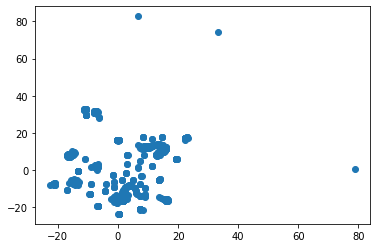

In [34]:
# plot t-SNE model as scatter plot
x = tsne_features[:,0]
y = tsne_features[:,1]
plt.scatter(x,y)
plt.show()

# Cluster Analysis with k-Means

    k        inertia
0   1  205677.531250
1   2  110008.414062
2   3   73563.796875
3   4   41071.402344
4   5   35149.593750
5   6   29562.322266
6   7   25476.375000
7   8   20076.390625
8   9   16742.826172
9  10   13510.857422


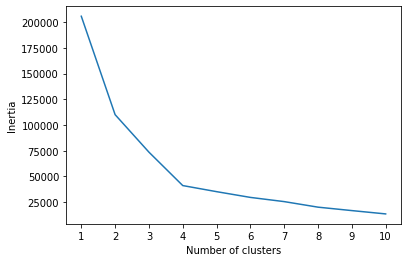

In [35]:
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
print(df_elbow)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Determine, if possible, where the elbow of the plot is, and at which value of 'k' appears.

*   It seems the elbow of the plot is at value k = 4.



In [36]:
tsne_features_df = pd.DataFrame(tsne_features)
tsne_features_df.reset_index(drop=True, inplace=True)

In [37]:
model = KMeans(n_clusters=4, random_state=0)

In [38]:
model.fit(tsne_features_df)

KMeans(n_clusters=4, random_state=0)

In [39]:
predictions = model.predict(tsne_features)
print(predictions)

[1 1 1 3 0 0 2 0 0 0 2 0 3 3 0 1 2 0 1 1 0 0 3 0 0 1 1 1 0 1 0 1 0 2 0 1 0
 3 0 0 0 0 2 0 0 0 0 0 0 1 2 0 2 3 0 0 0 1 0 0 2 0 3 2 1 0 3 0 1 0 1 1 1 0
 0 0 2 2 3 0 3 1 2 3 3 3 2 1 1 0 0 0 0 2 0 3 1 1 0 0 0 2 0 3 1 0 2 0 1 0 2
 0 1 1 0 0 2 0 0 0 1 0 0 0 3 0 2 1 2 0 3 1 2 2 0 0 2 0 1 0 3 1 2 3 1 0 0 3
 2 0 3 3 1 1 2 2 0 0 0 2 2 3 0 2 0 2 2 3 3 1 2 0 2 1 1 1 1 2 2 0 2 1 0 3 3
 2 1 0 1 0 2 3 0 0 1 2 1 2 0 2 1 3 2 1 0 0 0 2 0 2 1 2 2 1 1 2 2 2 3 1 2 1
 1 2 0 1 2 1 1 1 0 0 0 0 1 3 2 1 2 1 0 2 0 0 1 2 0 1 0 0 2 0 2 1 2 0 2 2 1
 2 2 1 1 1 3 2 0 2 3 2 1 1 3 0 2 0 1 0 0 0 0 1 2 1 1 0 1 0 2 2 1 0 1 0 0 1
 2 2 1 3 2 2 0 0 2 0 0 0 0 0 1 1 0 2 2 2 0 0 2 1 0 0 0 1 3 1 1 0 1 1 0 2 1
 3 2 0 0 0 2 0 1 1 0 1 0 0 0 1 1 2 0 1 1 0 2 1 2 0 1 0 0 1 1 2 2 3 1 2 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 2 1 1 2 1 2 2 0 0 0 0 1 1 1 0 2 0 2 2 1 3 2 1 2 0
 0 1 1 0 2 0 2 0 0 0 0 1 2 0 1 0 1 1 0 1 3 0 0 0 2 0 1 1 2 0 1 0 1 0 0 1 0
 2 2 2 2 3 1 2 2 1 2 0 3 0 1 0 3 1 2 0 1 0 0 0 0 0 1 0 1 0 1 1 0 2 1 1 1 2
 3 1 3 2 0 1 0 2 0 1 0 1 

In [40]:
tsne_features_df["class"] = model.labels_
tsne_features_df

,0,1,class
0,8.305763,11.814912,1
1,15.469349,10.022843,1
2,22.208977,16.314810,1
3,-7.136841,31.767305,3
4,0.394274,-23.594416,0
...,...,...,...
527,-6.448793,28.463854,3
528,14.575162,13.658982,1
529,16.362288,-15.947591,0
530,7.407052,-20.832094,0


In [41]:
tsne_features_df = pd.concat([crypto_CoinNames, tsne_features_df], axis = 1)
tsne_features_df

,CoinName,0,1,class
0,42 Coin,8.305763,11.814912,1
1,404Coin,15.469349,10.022843,1
2,EliteCoin,22.208977,16.314810,1
3,Bitcoin,-7.136841,31.767305,3
4,Ethereum,0.394274,-23.594416,0
...,...,...,...,...
527,ZEPHYR,-6.448793,28.463854,3
528,Gapcoin,14.575162,13.658982,1
529,Beldex,16.362288,-15.947591,0
530,Horizen,7.407052,-20.832094,0


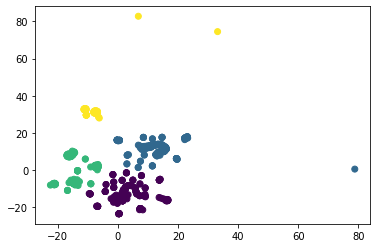

In [42]:
plt.scatter(tsne_features_df[0],tsne_features_df[1], c=tsne_features_df['class'])
plt.show()

# Recommendation

After analysis, it seems that these cryptocurrencies can be clustered into four disticnt clusters.  I recommend using the clusters for the basis of your proposed classification system. 